In [1]:
import pandas as pd
from more import pandas_helper
from more import scikit_helper as sh

In [2]:
df = pd.read_csv("../data/titanic/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
# Clean up columns
df.helper.drop_columns(['PassengerId','Name','Ticket','Cabin'],inplace=True) 
df.dropna(inplace=True)

# Convert categorical features using one-hot encoding
categorical_features = df.select_dtypes(include='object').columns
cat_with_dummies = pd.get_dummies(df[categorical_features],drop_first=True)
df.helper.drop_columns(categorical_features,inplace=True)
df = pd.concat([df,cat_with_dummies],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Survived      712 non-null int64
Pclass        712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
Sex_male      712 non-null uint8
Embarked_Q    712 non-null uint8
Embarked_S    712 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.0 KB


In [4]:
# create features and output objects
if 'Survived' in df:
    y = df['Survived'].values # get the labels we want
    del df['Survived'] # get rid of the class label
    X = df.values # use everything else to predict!

### Plotting Learning Curves

In [5]:
# Define CV object

from sklearn.model_selection import StratifiedShuffleSplit 
cv_object = StratifiedShuffleSplit(n_splits=3,
                         test_size  = 0.2,
                         random_state = 101      
                        )
print(cv_object)

StratifiedShuffleSplit(n_splits=3, random_state=101, test_size=0.2,
            train_size=None)


In [6]:
# Create scorers to evaluate the models. You can create multiple scorers to evaluate as shown below

from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, make_scorer
scoring = {'Recall (Survived Only)': make_scorer(recall_score, average='binary') # Positive Class Only
           ,'F1 (Weighted)': make_scorer(f1_score, average='weighted') # Weighted Score
          }            

In [7]:
# Create learner

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
svm_sgd = SGDClassifier(random_state=101)

piped_object = Pipeline([('scale', std_scl),  # do this
                         ('svm_model', svm_sgd)]) # and then do this

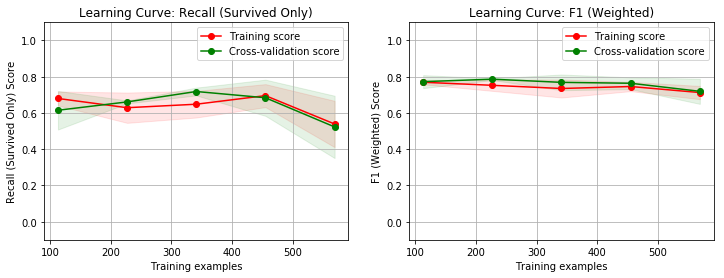

In [8]:
# Plot learning curves

sh.plot_learning_curves(estimator=piped_object
                        ,X=X, y=y
                        ,scoring=scoring
                        ,cv=cv_object
                        ,n_jobs=-1
                        ,verbose=0
                       )

**Training and Cross Validation Scores are close to each other, hence model is no overfitting**